<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Financial Time Series

In [1]:
import seaborn as sns; sns.set()
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 1.377432,  0.349982, -0.778797, -1.554857],
       [-1.304566,  1.710271,  0.971186, -0.491427],
       [-0.963474, -0.801828, -0.016876, -0.34788 ],
       [ 0.592974, -0.140255,  0.752619, -0.136122],
       [-1.029227, -0.663363, -0.241419,  0.532712],
       [ 0.571005, -0.413998,  1.510703, -0.920793],
       [-0.220262,  0.328105, -1.511556,  1.543768],
       [-0.23835 , -0.656555,  0.193779,  0.318102],
       [ 0.647915, -1.70126 ,  0.195353, -0.131324]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,1.377432,0.349982,-0.778797,-1.554857
1,-1.304566,1.710271,0.971186,-0.491427
2,-0.963474,-0.801828,-0.016876,-0.347880
3,0.592974,-0.140255,0.752619,-0.136122
4,-1.029227,-0.663363,-0.241419,0.532712
5,0.571005,-0.413998,1.510703,-0.920793
6,-0.220262,0.328105,-1.511556,1.543768
7,-0.238350,-0.656555,0.193779,0.318102
8,0.647915,-1.701260,0.195353,-0.131324


In [23]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,1.377432,0.349982,-0.778797,-1.554857
1,-1.304566,1.710271,0.971186,-0.491427
2,-0.963474,-0.801828,-0.016876,-0.347880
3,0.592974,-0.140255,0.752619,-0.136122
4,-1.029227,-0.663363,-0.241419,0.532712
5,0.571005,-0.413998,1.510703,-0.920793
6,-0.220262,0.328105,-1.511556,1.543768
7,-0.238350,-0.656555,0.193779,0.318102
8,0.647915,-1.701260,0.195353,-0.131324


In [24]:
df['No2'][3]  # value in column No2 at index position 3

-0.14025465288250361

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,1.377432,0.349982,-0.778797,-1.554857
2015-02-28,-1.304566,1.710271,0.971186,-0.491427
2015-03-31,-0.963474,-0.801828,-0.016876,-0.347880
2015-04-30,0.592974,-0.140255,0.752619,-0.136122
2015-05-31,-1.029227,-0.663363,-0.241419,0.532712
2015-06-30,0.571005,-0.413998,1.510703,-0.920793
2015-07-31,-0.220262,0.328105,-1.511556,1.543768
2015-08-31,-0.238350,-0.656555,0.193779,0.318102
2015-09-30,0.647915,-1.701260,0.195353,-0.131324


In [27]:
np.array(df).round(6)

array([[ 1.377432,  0.349982, -0.778797, -1.554857],
       [-1.304566,  1.710271,  0.971186, -0.491427],
       [-0.963474, -0.801828, -0.016876, -0.34788 ],
       [ 0.592974, -0.140255,  0.752619, -0.136122],
       [-1.029227, -0.663363, -0.241419,  0.532712],
       [ 0.571005, -0.413998,  1.510703, -0.920793],
       [-0.220262,  0.328105, -1.511556,  1.543768],
       [-0.23835 , -0.656555,  0.193779,  0.318102],
       [ 0.647915, -1.70126 ,  0.195353, -0.131324]])

### Basic Analytics

In [28]:
df.sum()

No1   -0.566555
No2   -1.988900
No3    1.074993
No4   -1.187821
dtype: float64

In [29]:
df.mean()

No1   -0.062951
No2   -0.220989
No3    0.119444
No4   -0.131980
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,1.377432,0.349982,-0.778797,-1.554857
2015-02-28,0.072866,2.060253,0.192388,-2.046284
2015-03-31,-0.890609,1.258425,0.175512,-2.394165
2015-04-30,-0.297635,1.118171,0.928131,-2.530286
2015-05-31,-1.326862,0.454808,0.686713,-1.997574
2015-06-30,-0.755857,0.040810,2.197416,-2.918367
2015-07-31,-0.976119,0.368915,0.685860,-1.374599
2015-08-31,-1.214469,-0.287640,0.879640,-1.056497
2015-09-30,-0.566555,-1.988900,1.074993,-1.187821


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.062951,-0.220989,0.119444,-0.131980
std,0.918825,0.956232,0.914403,0.885661
min,-1.304566,-1.701260,-1.511556,-1.554857
25%,-0.963474,-0.663363,-0.241419,-0.491427
50%,-0.220262,-0.413998,0.193779,-0.136122
75%,0.592974,0.328105,0.752619,0.318102
max,1.377432,1.710271,1.510703,1.543768


In [32]:
np.sqrt(df)

/Users/yves/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


,No1,No2,No3,No4
2015-01-31,1.173640,0.591593,NaN,NaN
2015-02-28,NaN,1.307773,0.985488,NaN
2015-03-31,NaN,NaN,NaN,NaN
2015-04-30,0.770048,NaN,0.867536,NaN
2015-05-31,NaN,NaN,NaN,0.729871
2015-06-30,0.755649,NaN,1.229107,NaN
2015-07-31,NaN,0.572805,NaN,1.242485
2015-08-31,NaN,NaN,0.440204,0.564005
2015-09-30,0.804931,NaN,0.441988,NaN


In [33]:
np.sqrt(df).sum()

/Users/yves/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


No1    3.504269
No2    2.472171
No3    3.964322
No4    2.536361
dtype: float64

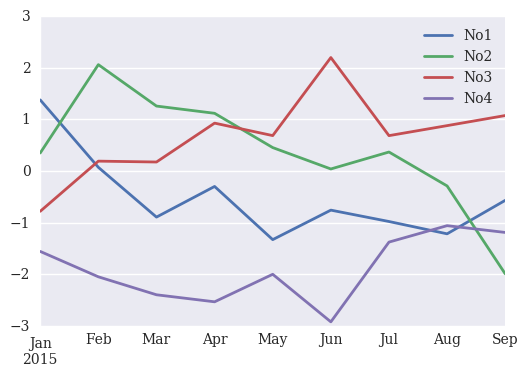

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    1.377432
2015-02-28   -1.304566
2015-03-31   -0.963474
2015-04-30    0.592974
2015-05-31   -1.029227
2015-06-30    0.571005
2015-07-31   -0.220262
2015-08-31   -0.238350
2015-09-30    0.647915
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

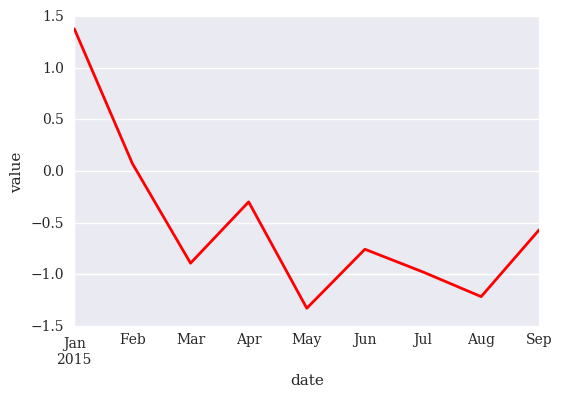

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,1.377432,0.349982,-0.778797,-1.554857,Q1
2015-02-28,-1.304566,1.710271,0.971186,-0.491427,Q1
2015-03-31,-0.963474,-0.801828,-0.016876,-0.347880,Q1
2015-04-30,0.592974,-0.140255,0.752619,-0.136122,Q2
2015-05-31,-1.029227,-0.663363,-0.241419,0.532712,Q2
2015-06-30,0.571005,-0.413998,1.510703,-0.920793,Q2
2015-07-31,-0.220262,0.328105,-1.511556,1.543768,Q3
2015-08-31,-0.238350,-0.656555,0.193779,0.318102,Q3
2015-09-30,0.647915,-1.701260,0.195353,-0.131324,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.296870,0.419475,0.058504,-0.798055
Q2,0.044917,-0.405872,0.673968,-0.174734
Q3,0.063101,-0.676570,-0.374141,0.576849


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,1.377432,1.710271,0.971186,-0.347880
Q2,0.592974,-0.140255,1.510703,0.532712
Q3,0.647915,0.328105,0.195353,1.543768


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.304566  1.710271  0.971186 -0.491427
        Odd       0.206979 -0.225923 -0.397837 -0.951369
Q2      Even      0.581989 -0.277126  1.131661 -0.528457
        Odd      -1.029227 -0.663363 -0.241419  0.532712
Q3      Even     -0.238350 -0.656555  0.193779  0.318102
        Odd       0.213826 -0.686578 -0.658101  0.706222

## Financial Data

In [48]:
from pandas_datareader import data as web

In [49]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4333 entries, 2000-01-03 to 2017-01-03
Data columns (total 6 columns):
Open         4333 non-null float64
High         4333 non-null float64
Low          4333 non-null float64
Close        4333 non-null float64
Volume       4333 non-null int64
Adj Close    4333 non-null float64
dtypes: float64(5), int64(1)
memory usage: 237.0 KB


In [50]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,11469.450195,11475.889648,11459.400391,11474.990234,0,11474.990234
2016-12-29,11411.360352,11459.190430,11404.820312,11451.049805,43753300,11451.049805
2016-12-30,11443.309570,11481.660156,11405.769531,11481.059570,41810900,11481.059570
2017-01-02,11426.379883,11617.280273,11414.820312,11598.330078,47456100,11598.330078
2017-01-03,11631.700195,11637.370117,11561.230469,11584.240234,88413500,11584.240234


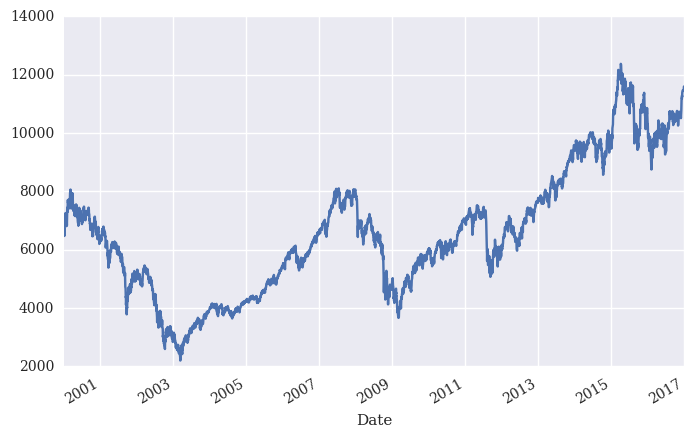

In [51]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [52]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 50.1 ms, sys: 1.69 ms, total: 51.8 ms
Wall time: 51.6 ms


In [53]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2016-12-28,11474.990234,0.000240,0.000240
2016-12-29,11451.049805,-0.002088,-0.002088
2016-12-30,11481.059570,0.002617,0.002617
2017-01-02,11598.330078,0.010162,0.010162
2017-01-03,11584.240234,-0.001216,-0.001216


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11793cc88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11aa5cfd0>], dtype=object)

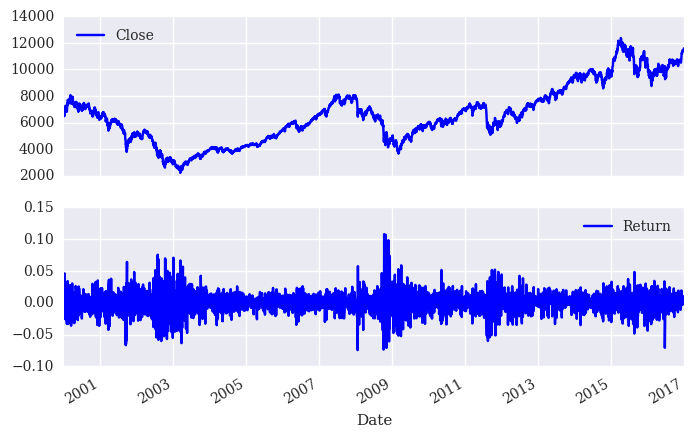

In [54]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [55]:
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()

In [56]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-12-28,11474.990234,10865.414504,10185.223334
2016-12-29,11451.049805,10884.129743,10189.750915
2016-12-30,11481.059570,10906.865444,10194.778851
2017-01-02,11598.330078,10936.089262,10201.201393
2017-01-03,11584.240234,10966.050223,10208.085918


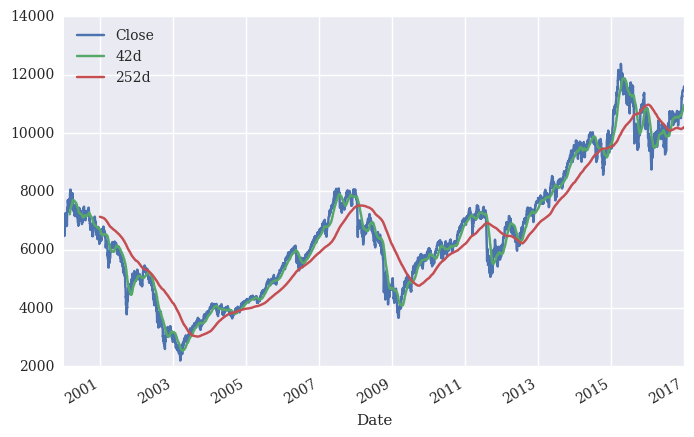

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [58]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aab4710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11af7bdd8>], dtype=object)

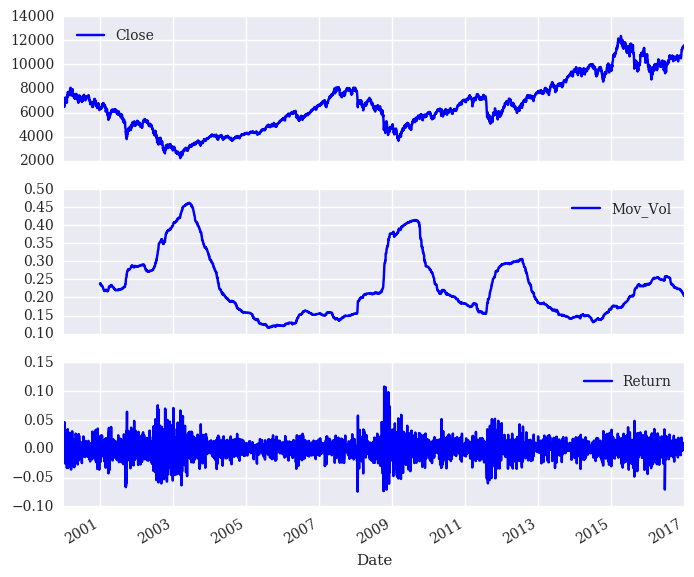

In [59]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [60]:
import pandas as pd
from urllib import request

In [61]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
request.urlretrieve(es_url, './data/es.txt')
request.urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt
# Windows: use dir

-rw-r--r--@ 1 yves  688500 Jan  4 12:26 ./data/es.txt
-rw-r--r--@ 1 yves  363485 Jan  4 12:26 ./data/vs.txt


In [62]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [63]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [64]:
for line in lines[3883:3890]:
    print(line[41:], end='')

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [65]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [66]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [67]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [68]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [69]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [70]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [71]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [72]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [73]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [74]:
data = data[data.index < '2015-12-31']

In [75]:
data.tail()

,EUROSTOXX,VSTOXX
2015-12-23,3286.68,20.2504
2015-12-24,3284.47,NaN
2015-12-28,3256.49,22.4544
2015-12-29,3314.28,21.6067
2015-12-30,3287.98,22.1745


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b25ab00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b6c6908>], dtype=object)

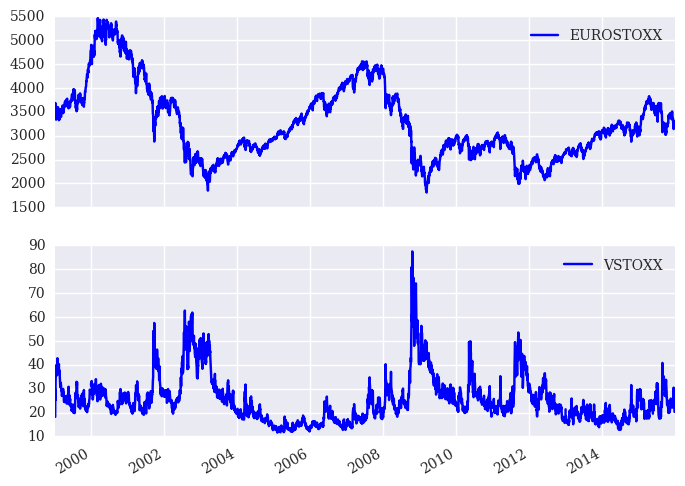

In [76]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [77]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [78]:
rets.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117adb208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117b80470>], dtype=object)

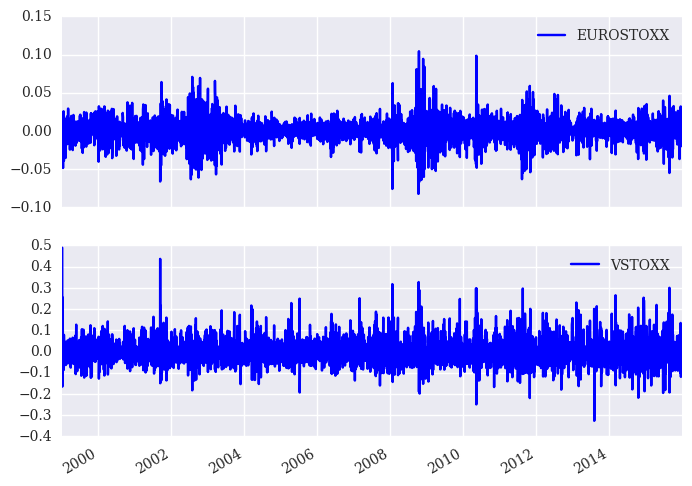

In [79]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [80]:
import numpy as np

In [81]:
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([ -2.83831710e+00,  -2.67365316e-04])

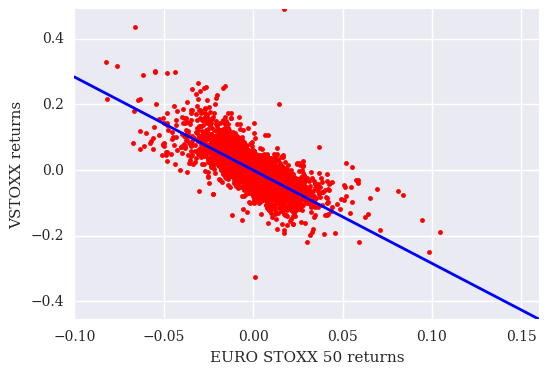

In [82]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [83]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.737094
VSTOXX,-0.737094,1.000000


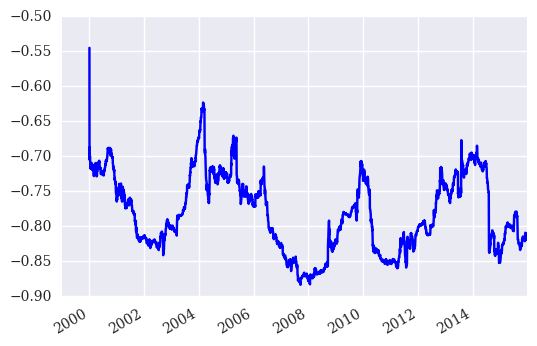

In [84]:
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [85]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [86]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [87]:
year = '2016'
month = '12'
days = ['27', '28', '29', '30']
  # dates might need to be updated

In [88]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [89]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39738 entries, 2016-12-27 10:00:01 to 2016-12-30 23:18:28
Data columns (total 6 columns):
bid        39738 non-null float64
bdepth     39738 non-null int64
bdeptht    39738 non-null int64
offer      39738 non-null float64
odepth     39738 non-null int64
odeptht    39738 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.1 MB


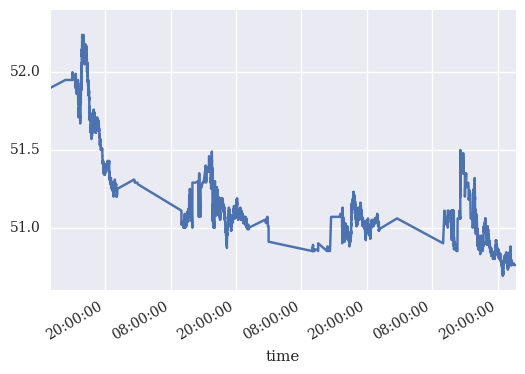

In [90]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bc17b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11cf95b38>], dtype=object)

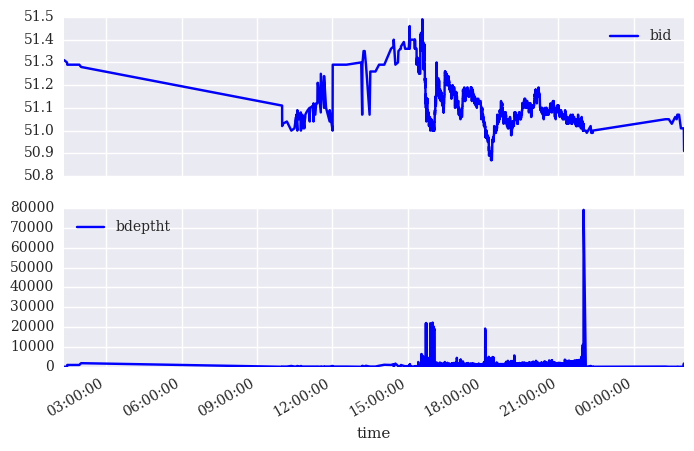

In [91]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2016, 12, 28, 0, 0))
 &  (NKE.index < dt.datetime(2016, 12, 29, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)
# tag: aapl_day
# title: Apple stock tick data and volume for a trading day

In [92]:
NKE_resam = NKE.resample(rule='5min').mean()
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2016-12-27 10:00:00,51.9,100.0,100.0,51.95,100.0,100.0
2016-12-27 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN


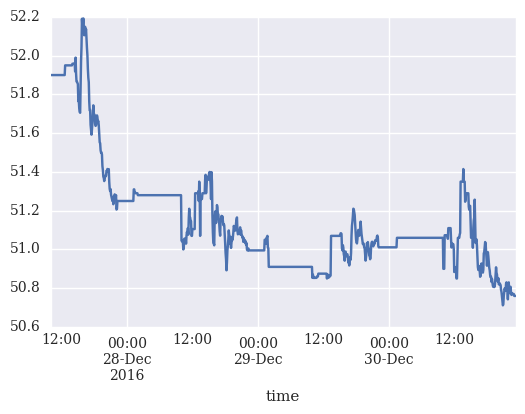

In [93]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [94]:
def reversal(x):
    return 2 * 95 - x

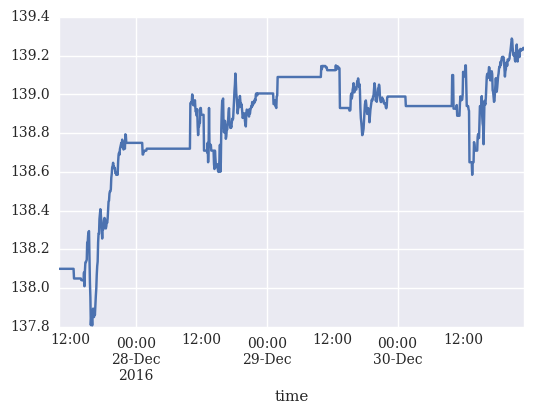

In [95]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [96]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>